In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("ticks")

from tables import *

import sys

In [60]:
mins = '../orbits_24th_attempt/orb30_pot/GADGET-OUTPUT/potential_minima.h5'

orb_file = '../orbits_18th_attempt/orbits_temp_e1.0/orb_00001.dat'

In [49]:
mins_h5file = open_file(mins, 'a')
mins_table = mins_h5file.root.potential.readout

xmin1 = np.array([j['xmin1'] for j in mins_table.iterrows()])
ymin1 = np.array([j['ymin1'] for j in mins_table.iterrows()])
zmin1 = np.array([j['zmin1'] for j in mins_table.iterrows()])
coords_min1 = np.vstack((xmin1, ymin1, zmin1))

xmin2 = np.array([j['xmin2'] for j in mins_table.iterrows()])
ymin2 = np.array([j['ymin2'] for j in mins_table.iterrows()])
zmin2 = np.array([j['zmin2'] for j in mins_table.iterrows()])
coords_min2 = np.vstack((xmin2, ymin2, zmin2))

In [50]:
snapshots = np.array([j['snapshot'] for j in mins_table.iterrows()])

distances = np.sqrt((coords_min1[0] - coords_min2[0])**2 + (coords_min1[1] - coords_min2[1])**2)

distances_3d = np.sqrt((coords_min1[0] - coords_min2[0])**2 + (coords_min1[1] - coords_min2[1])**2 +
    (coords_min1[2] - coords_min2[2])**2)

In [51]:
print("Pericenter from simulation = {:.2f} kpc".format(distances_3d.min()))

Pericenter from simulation = 22.29 kpc


In [65]:
from astropy import table
orb = table.Table.read(orb_file, format="ascii")

orb_type = 'kepl'

x = orb["x_" + orb_type]
y = orb["y_" + orb_type]
z = orb["z_" + orb_type]

calculated_dist = np.sqrt(x**2 + y**2 + z**2)

x_dt01 = np.linspace(0, 54, len(calculated_dist))

In [66]:
print("Calculated pericenter = {:.2f} kpc".format(calculated_dist.min()))

Calculated pericenter = 7.23 kpc


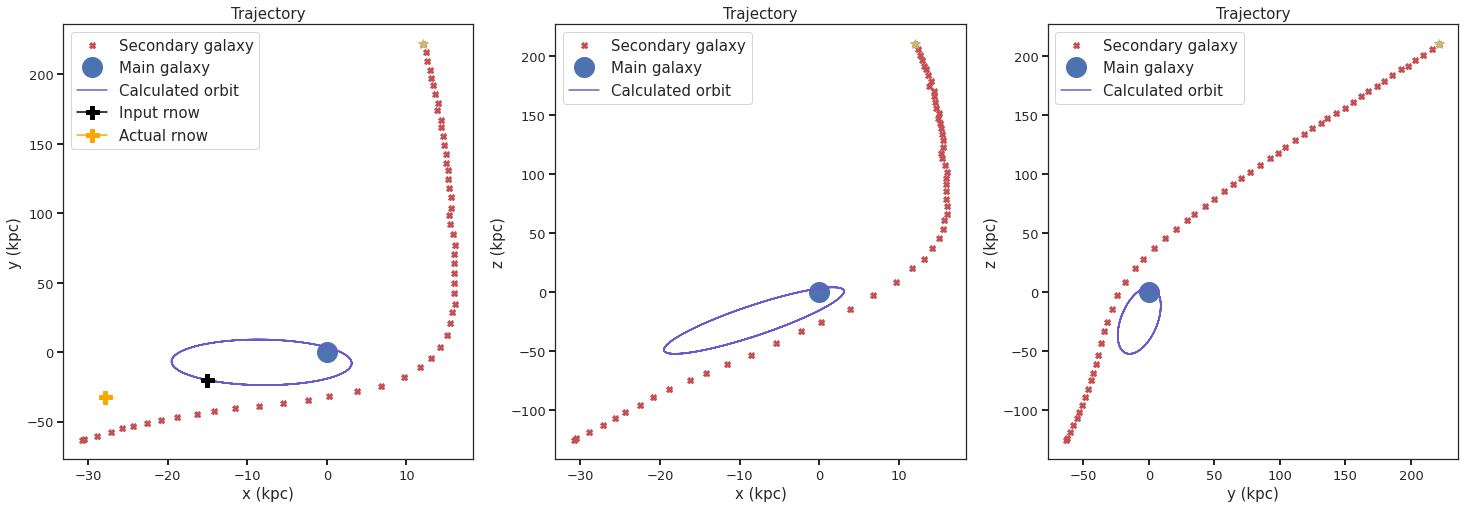

In [56]:
fontsize = 15
labelsize = 13

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    axs[i].yaxis.set_tick_params(labelsize=labelsize, width=2)
    axs[i].xaxis.set_tick_params(labelsize=labelsize, width=2)

axs[0].plot(coords_min2[0] - coords_min1[0], coords_min2[1] - coords_min1[1], 'rX', label='Secondary galaxy')
axs[0].plot(coords_min1[0][0], coords_min1[1][0], 'bo', markersize=20, label="Main galaxy")
axs[0].plot(x, y, color='slateblue', label="Calculated orbit")
axs[0].plot(-15.0, -20.0, marker='P', color='black', markersize=13, label="Input rnow")
axs[0].plot(-27.805, -32.492, marker='P', color='orange', markersize=13, label="Actual rnow")
axs[0].plot(coords_min2[0][0], coords_min2[1][0], 'y*', markersize=10)
axs[0].set_ylabel('y (kpc)', fontsize=fontsize)
axs[0].set_xlabel('x (kpc)', fontsize=fontsize)
axs[0].set_title('Trajectory', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)

axs[1].plot(coords_min2[0] - coords_min1[0], coords_min2[2] - coords_min1[2], 'rX', label='Secondary galaxy')
axs[1].plot(coords_min1[0][0], coords_min1[2][0], 'bo', markersize=20, label="Main galaxy")
axs[1].plot(x, z, color='slateblue', label="Calculated orbit")
axs[1].plot(coords_min2[0][0], coords_min2[2][0], 'y*', markersize=10)
axs[1].set_ylabel('z (kpc)', fontsize=fontsize)
axs[1].set_xlabel('x (kpc)', fontsize=fontsize)
axs[1].set_title('Trajectory', fontsize=fontsize)
axs[1].legend(fontsize=fontsize)

axs[2].plot(coords_min2[1] - coords_min1[1], coords_min2[2] - coords_min1[2], 'rX', label='Secondary galaxy')
axs[2].plot(coords_min1[1][0], coords_min1[2][0], 'bo', markersize=20, label="Main galaxy")
axs[2].plot(y, z, color='slateblue', label="Calculated orbit")
axs[2].plot(coords_min2[1][0], coords_min2[2][0], 'y*', markersize=10)
axs[2].set_ylabel('z (kpc)', fontsize=fontsize)
axs[2].set_xlabel('y (kpc)', fontsize=fontsize)
axs[2].set_title('Trajectory', fontsize=fontsize)
axs[2].legend(fontsize=fontsize)

# plt.savefig("../../Figures/orbits_25th_attempt/orb07_orbits_comparison.pdf", format='pdf')

Text(0.5, 1.0, 'Projected distance')

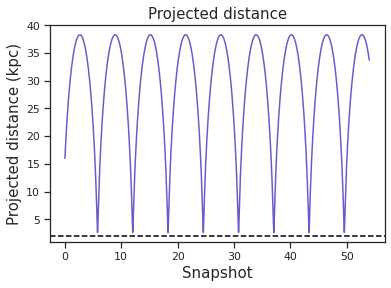

In [44]:
#Pra esse plot da distância eu preciso colocar a escala de tempo do calcula_orbita igual a escala de tempo
#das simulações... ou seja, no calcula_orbita vai de -1Gyr até +1Gyr se não me engano, e nas simulações de 
#-1Gyr até +0.3Gyr ou coisa assim...

# plt.plot(snapshots, distances_3d, 'ro')
plt.plot(x_dt01, calculated_dist, color='slateblue')
plt.axhline(y=2, xmin=0, xmax=40, color='black', linestyle='--')
plt.xlabel('Snapshot', fontsize=fontsize)
plt.ylabel('Projected distance (kpc)', fontsize=fontsize)
plt.title('Projected distance', fontsize=fontsize)

In [18]:
#Esses três valores são o qx, qy e qz de uma órbita que era pra ter q=2Kpc.
#Provavelmente a ideia é que sejam as componentes normalizadas do vetor de pericentro
np.sqrt(0.277023**2 + 0.362964**2 + 0.889672**2)

1.0000004377044043

In [45]:
calculated_dist.min()

2.614844404778227